In [8]:
from scipy import signal
import matplotlib.pyplot as plot
import numpy as np
def Gen_squ_wave(p_freq, maxNum = 20):
    plot_pts = 1000
    n = np.linspace(0, maxNum, plot_pts, endpoint=True)
    
    #square wave to represnts prime number as frequency
    (amp_scale,amp_shift) = (0.5,-0.5) #range -1 < p_wave < 0 
    shift_right = -((1/p_freq)*np.pi)
    d = 1-(1/p_freq)
    scale_wave = 2/p_freq #dip always 1 therefore duty
    cover_count = amp_scale*signal.square((scale_wave*np.pi*n)+shift_right, duty = d) + amp_shift
    
    #to include given prime freq in p detection
    p_start = int((plot_pts/(2*maxNum))*(2*p_freq-1))
    p_end = int((plot_pts/(2*maxNum))*(2*p_freq+1))
    cover_count[p_start:p_end]+=1
    
    # Plot the square wave
    plot.plot(n, cover_count)
    plot.xticks(range(0, int(max(n)), 1))
    # Give x,y,title axis label
    plot.xlabel('Whole Numbers')
    plot.ylabel('composit lvl')
    plot.title('Prime Wave Coverage')
    plot.axhline(y = 0, color = 'r')
    # Display
    plot.grid()
    plot.show()
    
    
    return (n, cover_count)



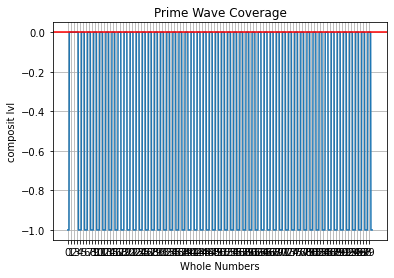

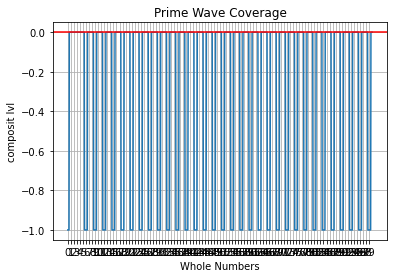

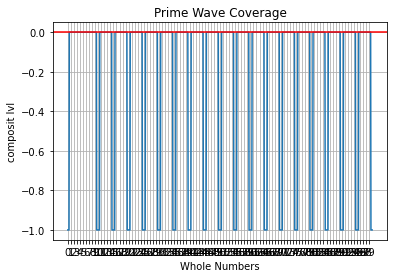

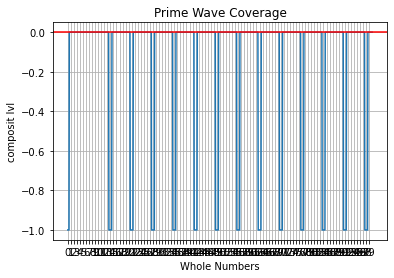

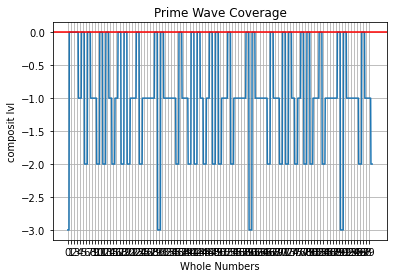

In [10]:
(n2, cover_count2) = Gen_squ_wave(2,100)
(n3, cover_count3) = Gen_squ_wave(3,100)
cc_super_pos = cover_count3 + cover_count2 + trogacover_count5
# Plot the square wave
plot.plot(n2, cc_super_pos)
plot.xticks(range(0, int(max(n2)), 1))
# Give x,y,title axis label
plot.xlabel('Whole Numbers')
plot.ylabel('composit lvl')
plot.title('Prime Wave Coverage')
plot.axhline(y = 0, color = 'r')
# Display
plot.grid()
plot.show()


#1 =  Known prime
#0 = found primes (w/ some error read below) 
#<0 =  level of composition (number of unique primes that lead to composite)
# result wave has freq of summed know prime -> 2w+w3+w5 => f = 2*3*5 = 30 

In [56]:
'''
Note's on Error and Effeciency:
First error at p^2 for first p not added
e.g.
w2+w3 - first error 25 = 5^2 
1,2,3,4,[5],6,[7],8,9,... (1/2)*100 + (1/3)*100 = 50+33.3 = covers 83.3% of numbers
1x2, 1x3, 
2x2, 2x3, 
3x2, 3x3, 
4x2, 4x3, 
5x2, 5x3,
[No 5x5] -  first error will occure here as 5x2,5x3,5x4,[No 5x5], 5x6 = is covered 
6x2, 6x3
'''

"\nNote's on Error and Effeciency:\nFirst error at p^2 for first p not added\ne.g.\nw2+w3 - first error 25 = 5^2 \n1,2,3,4,[5],6,[7],8,9,... (1/2)*100 + (1/3)*100 = 50+33.3 = covers 83.3% of numbers\n1x2, 1x3, \n2x2, 2x3, \n3x2, 3x3, \n4x2, 4x3, \n5x2, 5x3,\n[No 5x5] -  first error will occure here as 5x2,5x3,5x4,[No 5x5], 5x6 = is covered \n6x2, 6x3\n"

In [ ]:
'''
With n p_waves we can find primes, P_s, in a range of p_n < P_s < (p_[n+1])^2
let P_s = [p_a,p_b,...]
such that 
p_ax1 - not covered
    but 
        p_axp_n[0]/p_ax2 - will be covered by known base_case p_n's e.g 2,3,...
        p_axp_n[1]/p_ax3 - will be covered by known base_case p_n's e.g 2,3,...
    till p_axp_a - not covered
    
p_bx1 - not covered
    but 
        p_bxp_n[0]/p_bx2 - will be covered by known base_case p_n's e.g 2,3,...
        p_bxp_n[1]/p_bx3 - will be covered by known base_case p_n's e.g 2,3,...
    till p_bxp_b - not covered
        
p_axp_a - not covered the samlest number of 
but p_axp_b will also not be covered but p_axp_b > p_axp_a
therefore:
    p_axp_a is the 1st error
    p_axp_b is the 2nd error
    p_bxp_b is the 3rd error
    and so on ...

for P_s < p_axp_a < P_[s+1] < p_axp_b < P_[s+2] < p_bxp_b
    P_[s,s+1,s+2] set is accurate 
    
Error Algo: 
    given know bases_cases P_n - [2,3,...,P]
    
    for P_s in P and not in P_n:
        for p_az in P_s:
            if P_found < (p_az)^2 < P_found < (p_[az+1]*p_az) < P_found < (p_[az+1])^2
                P_found is an accuratly found prime
'''

In [ ]:
'''            
known_p0(2), known_p1(3), ..., P , ... , p3^2(5^2) = E, ... , P , ... , p4xp3(5*7) = E,  ... , P , ... ,  p4^2(7^2) = E, ...

Error at: 
    (p[n+0])^2 , pn[n+1]*p[n+1],(p[n+1])^2, p[n+1]*p[n+2], (p[n+2])^2, ...,p[n+k-1]*p[n+k],(p[n+k])^2
    
can find FP in P at:
    FP0, (p[n+0])^2, FP1, pn[n+1]*p[n+1], FP2, (p[n+1])^2, FP3, ..., FP_k-1, p[n+k-1]*p[n+k], FP_k, (p[n+k])^2
'''